In [1]:

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Can be used for regression and classification.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
import pickle

In [2]:
data=pd.read_csv('wine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
#Observation
#Alcohol_content	 it is object data type thats why we dont get that information in the data describe.
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [7]:
#There is no NaN in the Alcohol_content, good move. Next is we have to encode the alcohol_content by using technique because it follows some order 
# recommonded to use ordinal encoder.
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder(categories=[['Low','Medium','High']])
df1=ord_enc.fit_transform(data[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

In [8]:
#override the Alcohol_content with codes
data['Alcohol_content']=df1


In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5


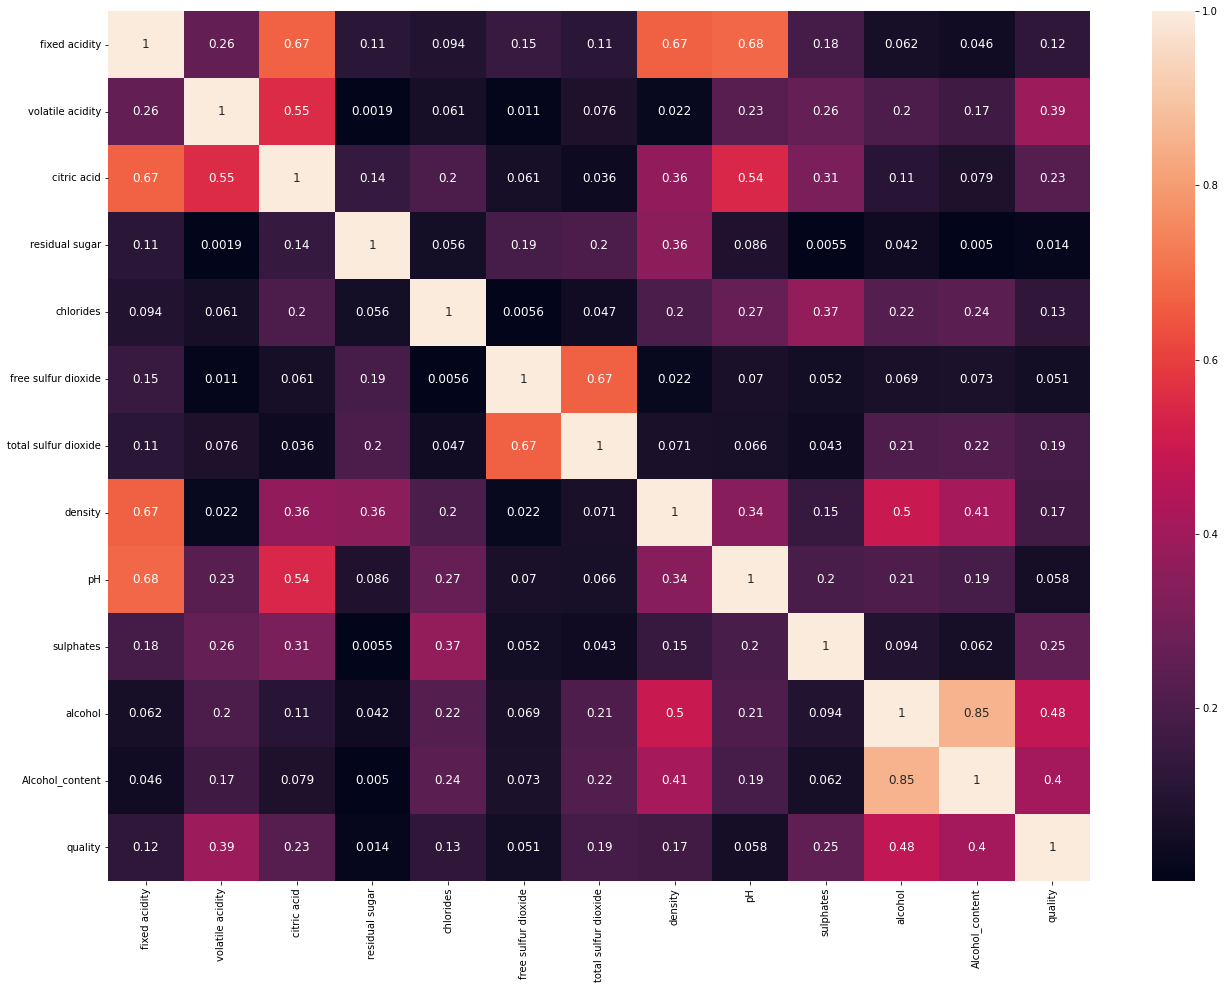

In [11]:
#This time finding the correalation feaures versus feature (Using heat map instead of scatter of VIF)
df_corr=data.corr().abs() # this code will give you coefficient of the one varieable of all other variables(Relationship)
plt.figure(figsize=(22,16))
sns.heatmap(df_corr, annot=True, annot_kws={'size':12}) # If you wantto keep number values then we have to mention annot =true
plt.show()

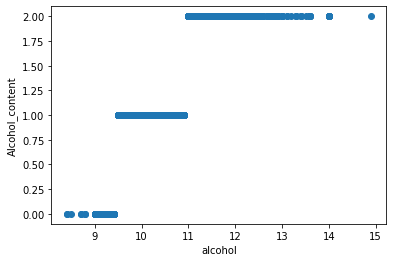

In [12]:

# Heat map is used to check the multi coliniarity
#Explanation: Corelation between Feature versus features and feature versus label, Dont consider opposite diagonal image.
#Corelation is always between +1 to -1
#As bright as it conclused there is multicoliniarity problems
#Coefficient based on the heat map reperesents 1 unit increase then it draws the corelation values
# Concludes there is multicoliniarity is problem with Alcohol and Alcohol_content
# To know more about clarity let us draw scatter.
plt.scatter(data.alcohol,data.Alcohol_content)
plt.xlabel('alcohol')
plt.ylabel('Alcohol_content')
plt.show()

In [16]:
#As per the scatter plot it concludes that there is multicoliniariry towards the positive directions.
# Now we need to select which one we need to to remove the feaure based on the coeffieciet value here are removing alcohol_content because corelation value is less.
X=data.drop(columns=['Alcohol_content','quality'])
y=data['quality']

In [17]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [18]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [26]:
x_train,x_test,y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=41)

In [29]:
clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [58]:
clf.score(x_train, y_train) # This is training score

1.0

In [59]:
y_pred=clf.predict(x_test)

In [60]:
accuracy_score(y_test,y_pred)

0.6175

In [61]:
#conclusion is 61% is the result. Now can we increase using hypertuning parameters (Gridge search CV)
#By using this technique we can control the depth, leaf node size, and samples called tree pruning.
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(10,15),
    'max_leaf_nodes':range(2,4),
    'max_samples_leaf':range(2,12),
    'mini_samples_split':range(3,10),
}


In [62]:
grid_search=GridSearchCV(estimator=clf,
                        param_grid=grid_param,
                        cv=5,
                        n_jobs=-1)

In [57]:
grid_search.fit(x_train,y_train)

ValueError: Invalid parameter max_samples_leaf for estimator DecisionTreeClassifier(max_depth=10, max_leaf_nodes=2). Check the list of available parameters with `estimator.get_params().keys()`.

In [51]:
best_parameters=grid_search.best_params_
print(best_parameters)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'